Bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Exportação dos dados:

In [2]:
path_teste = r'C:\Users\T-Gamer\Desktop\Python_Estudo\Curso_analise_de_dados\Titanic\test.csv'
path_treino = r'C:\Users\T-Gamer\Desktop\Python_Estudo\Curso_analise_de_dados\Titanic\train.csv'

teste = pd.read_csv(path_teste)
treino = pd.read_csv(path_treino)

treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Informações básicas sobre o dataset:

In [3]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

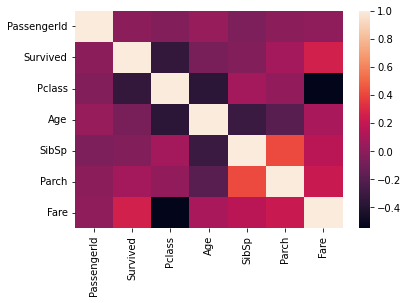

In [4]:
treino.columns

cor = treino.corr()
sns.heatmap(data=cor)

Definindo novas colunas para algumas variáveis categóricas:

In [5]:
treino['Embarked_C'] = (treino['Embarked'] == 'C').astype(int)
treino['Embarked_S'] = (treino['Embarked'] == 'S').astype(int)

treino['Cabin_null'] = (treino['Cabin'].isnull()).astype(int)

treino['Name_Mrs'] = treino['Name'].str.contains('Mrs').astype(int)
treino['Name_Master'] = treino['Name'].str.contains('Master').astype(int)
treino['Name_Mr'] = treino['Name'].str.contains('Mr').astype(int)
treino['Name_Miss'] = treino['Name'].str.contains('Miss').astype(int)

Separando os dados:

In [6]:
y = treino['Survived']
X = treino.drop('Survived', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

print(X_train.shape, X_valid.shape)

(712, 18) (179, 18)


Discriminando variáveis categóricas e numéricas:

In [7]:
num_col = X_train.select_dtypes(exclude='object').columns
cat_col = X_train.select_dtypes('object').columns

print(f'Colunas de dados numéricos: {num_col}')
print()
print(f'Colunas de dados categóricos: {cat_col}')

Colunas de dados numéricos: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_S', 'Cabin_null', 'Name_Mrs', 'Name_Master', 'Name_Mr',
       'Name_Miss'],
      dtype='object')

Colunas de dados categóricos: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


Cardinalidade das variáveis categóricas:

In [8]:
c_col = cat_col.drop('Name')

for i in list(c_col):
    card = X_train[i].nunique()
    print(f'{i}: {card}')


Sex: 2
Ticket: 568
Cabin: 118
Embarked: 3


Definindo transformações e os modelos:

In [9]:
num_trans = SimpleImputer(strategy='mean')

cat_trans = Pipeline(steps=[
    ('impt', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, num_col),
    ('cat', cat_trans, c_col)
])

modelo1 = RandomForestClassifier(n_estimators=25, n_jobs=8, random_state=0)
modelo2 = LogisticRegression(random_state=0)
modelo3 = XGBClassifier(n_estimators=25, learning_rate=0.5, n_jobs=8, random_state=0)

Definindo as pipelines:

In [10]:
pipe1 = Pipeline(steps=[
    ('prep', preprocessor),
    ('mod', modelo1)
])

pipe2 = Pipeline(steps=[
    ('prep', preprocessor),
    ('mod', modelo2)
])

pipe3 = Pipeline(steps=[
    ('prep', preprocessor),
    ('mod', modelo3)
])


Aplicando as pipelines e visualizando seus respectivos erros médios absolutos:

In [11]:
pipe1.fit(X_train, y_train)
pipe2.fit(X_train, y_train)
pipe3.fit(X_train, y_train)

mae1 = mean_absolute_error(y_valid, pipe1.predict(X_valid))
mae2 = mean_absolute_error(y_valid, pipe2.predict(X_valid))
mae3 = mean_absolute_error(y_valid, pipe3.predict(X_valid))

print(f'Erro médio absoluto:')
print(f'R.F. Classifier: {mae1}')
print(f'L. Regressor: {mae2}')
print(f'XGB Classifier: {mae3}')

Erro médio absoluto:
R.F. Classifier: 0.16759776536312848
L. Regressor: 0.1564245810055866
XGB Classifier: 0.21787709497206703


c:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Implementando as colunas adicionais aos dados teste:

In [12]:

teste['Embarked_C'] = (teste['Embarked'] == 'C').astype(int)
teste['Embarked_S'] = (teste['Embarked'] == 'S').astype(int)

teste['Cabin_null'] = (teste['Cabin'].isnull()).astype(int)

teste['Name_Mrs'] = teste['Name'].str.contains('Mrs').astype(int)
teste['Name_Master'] = teste['Name'].str.contains('Master').astype(int)
teste['Name_Mr'] = teste['Name'].str.contains('Mr').astype(int)
teste['Name_Miss'] = teste['Name'].str.contains('Miss').astype(int)

Aplicando a pipeline a todo conjunto de dados e prevendo os resultados para os dados teste:

In [13]:
pipe1.fit(X,y)

p = pipe1.predict(teste)

prev = pd.Series(p, index=teste['PassengerId'], name='Survived')
prev.to_csv('Pipeline', header=True)

print(prev)

PassengerId
892     0
893     0
894     0
895     0
896     0
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64


In [16]:
from cmath import nan

dados_amigos = {'PassengerId':[1310], 'Pclass':[1] , 'Name':['David'], 'Sex':['male'], 'Age':[29], 'SibSp':[1] , 'Parch':[1] , 'Ticket':[2668], 'Fare':[300], 'Cabin':[nan] , 'Embarked':['C'],
                'Embarked_C':[1], 'Embarked_S':[0], 'Cabin_null':[1], 'Name_Mrs':[0] , 'Name_Master':[0] , 'Name_Mr':[0] , 'Name_Miss':[0] }

dados = pd.DataFrame(data=dados_amigos)

pred = pipe1.predict(dados)
if pred == 0:
    print('Não sobreviveu :(')
else:
    print('Sobreviveu :)')

Não sobreviveu :(
